# 8.2 TensorFlow & Keras

- Installing TensorFlow
- Loading images

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 44.43 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.preprocessing.image import load_img

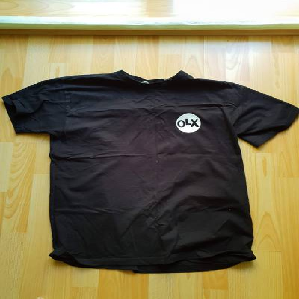

In [7]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"

load_img(fullname, target_size=(299,299))


In [8]:
img = load_img(fullname, target_size=(299,299))

print(img)

x = np.array(img)
x.shape

<PIL.Image.Image image mode=RGB size=299x299 at 0x7E2337DFF8F0>


(299, 299, 3)

# 8.3 Pre-trained convolutional neural networks

- Imagenet dataset: <a href="https://www.image-net.org/">https://www.image-net.org/</a>
- Pre-trained models: <a href=https://keras.io/api/applications/>https://keras.io/api/applications/</a>

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from  tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
X = np.array([x,x,x])
X.shape

(3, 299, 299, 3)

In [12]:
X = preprocess_input(np.array([x]))
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [13]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', np.float32(0.6819623)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140163)),
  ('n04370456', 'sweatshirt', np.float32(0.03432487))]]

# 8.4 Convolutiona neural networks

- Types of layers: convolutional and dense
- COnvolutional layers and filters
- Dense layers

Thare are more layers. Read here: [http://cs231n.github.io](http://cs231n.github.io)


Summary:
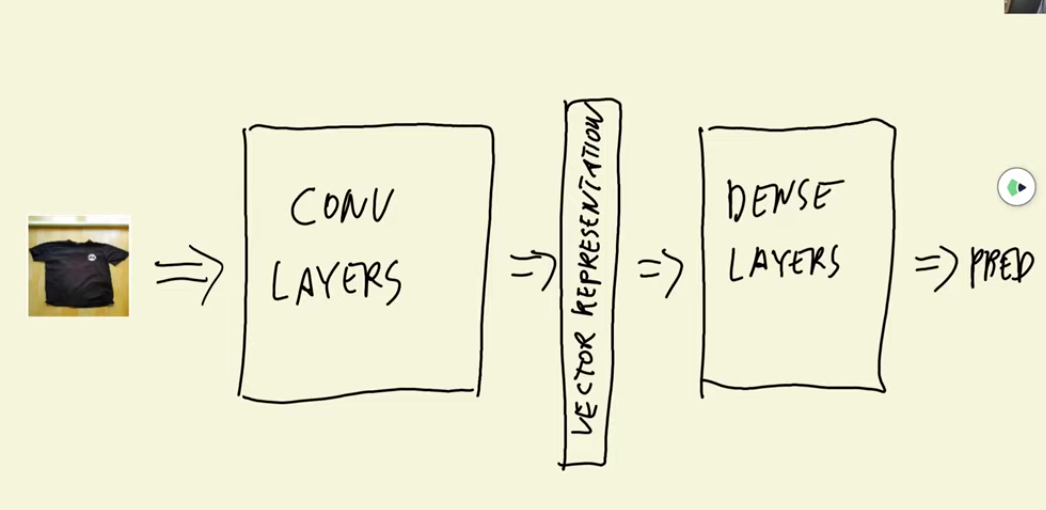

# 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train Xception on small images (150x150)

(Better to run it with a GPU)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [20]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32)

Found 3068 images belonging to 10 classes.


In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
X,y = next(train_ds)

In [23]:
X

array([[[[-0.06666666, -0.7019608 , -0.654902  ],
         [-0.05882353, -0.69411767, -0.64705884],
         [-0.0745098 , -0.70980394, -0.6627451 ],
         ...,
         [-0.2235294 , -0.7882353 , -0.78039217],
         [-0.20784312, -0.77254903, -0.7647059 ],
         [-0.19999999, -0.7647059 , -0.75686276]],

        [[-0.0745098 , -0.70980394, -0.6627451 ],
         [-0.05098039, -0.6862745 , -0.6392157 ],
         [-0.05098039, -0.6862745 , -0.6392157 ],
         ...,
         [-0.19215685, -0.75686276, -0.7490196 ],
         [-0.19999999, -0.7647059 , -0.75686276],
         [-0.20784312, -0.77254903, -0.7647059 ]],

        [[-0.06666666, -0.7019608 , -0.654902  ],
         [-0.0745098 , -0.70980394, -0.6627451 ],
         [-0.09019607, -0.7254902 , -0.6784314 ],
         ...,
         [-0.19999999, -0.78039217, -0.77254903],
         [-0.16862744, -0.7490196 , -0.7411765 ],
         [-0.15294117, -0.73333335, -0.7254902 ]],

        ...,

        [[ 0.2313726 , -0.4980392 , -0

In [26]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32, shuffle = False)

Found 341 images belonging to 10 classes.


`Include_top = False` means we are not includind the Dense Layers
`base_model.trainable =False` means we are freezening the convolutional layers


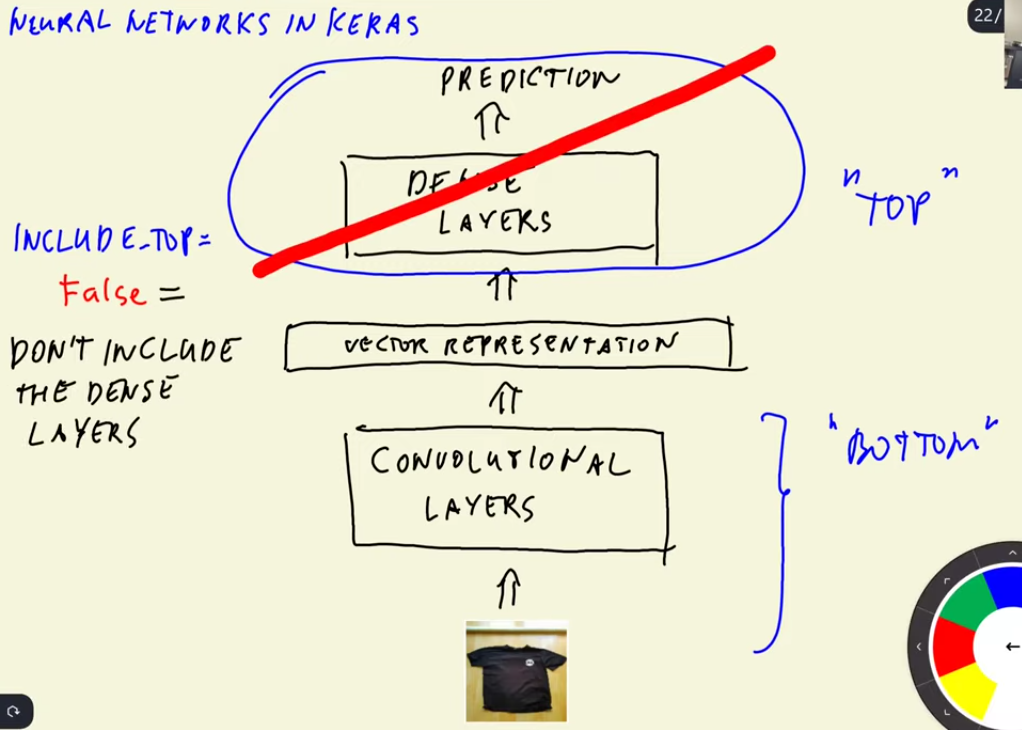

In [46]:
base_model = Xception(weights="imagenet",
                      include_top=False,
                      input_shape=(150,150, 3)
                      )

base_model.trainable = False

#Create a new top

inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training = False)

#flatten = keras.layers.Flatten()(pooling)
vectors = keras.layers.GlobalAveragePooling2D()(base)

#dense = keras.layers.Dense(64, activation="relu")(flatten)

outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

In [40]:
# preds = model.predict(X)

# print(preds.shape)


# preds[0]


(32, 10)

In [47]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [48]:
history = model.fit(train_ds,epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6019 - loss: 1.5917

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.6026 - loss: 1.5885 - val_accuracy: 0.7947 - val_loss: 0.8475
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.8341 - loss: 0.5295 - val_accuracy: 0.7889 - val_loss: 0.8018
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 297s 3s/step - accuracy: 0.8960 - loss: 0.2976 - val_accuracy: 0.7977 - val_loss: 0.8123
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.9298 - loss: 0.1904 - val_accuracy: 0.7918 - val_loss: 0.9534
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.9392 - loss: 0.1695 - val_accuracy: 0.8035 - val_loss: 0.8145
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.9611 - loss: 0.1017 - val_accuracy: 0.8240 - val_loss: 0.8618
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.9703 - loss: 0.0850 - val_accuracy: 0.7947 - val_loss: 0.9306
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 294s 3s/step - accuracy: 0.9781 - loss: 0.0697 - val_accuracy: 0.8094 - val_loss: 0.

In [49]:
plt.plot(history.history["accuracy"],label = "train")
plt.plot(history.history["val_accuracy"],label = "val")
plt.legend()
plt.show()

NameError: name 'history' is not defined

# 8.6 Adjusting the learning rate